In [43]:
# <import your dependencies here>
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd

# Edit this section

* Load_data:
    * load data from csv using `\t` as the separator.
    * Drop irrelevant columns
    * Label encode
    * select the main features and make an array of values (an array of arrays)
        * Example format of this:
            * `x = data_main[['Education', 'Kidhome', 'Teenhome' ......
                   'Z_CostContact', 'Z_Revenue']].values`
    * Scalarization of the features
    * return `scaled_x` variable which is a variable containing the scaled values of x

* apply_pca:
    * return `x_pca` variable which is the set of reduced features.
    * for ideal results, use n_components as 2. Feel free to experiment with this value but n_components = 2 is ideal case.

* find_optimal_clusters:
    * this is to find the optimal number of clusters using the elbow method.
    * find the values of inertia till max_clusters+1 and append the inertia values to an array.
    * return the inertia array with `inertia` variable. `VERY IMPORTANT TO SEE THE GRAPH`

* perform_kmeans_clustering:
    * use kmeans `init = "k-means++"`, `max_iter=300`, `n_init = 10`, `random_state` is your choice and `n_clusters` is the best elbow value.
    * return the kmeans fit predict values with `y_kmeans` variable.

* perform_agglomerative_clustering:
    * Linkage method is "ward" and n_clusters is the best elbow value.
    * return the agglomerative clustering values after fit predicting the `x` feature values as `y_agglomerative` variable name.

* for dendrogram:
    * get_linkages:
        * it helps to form the linkages between x and in the 'ward' method.
        * return `linked` variable which has the linkages.
    * plot_dendrogram:
        * it is to plot the dendrogram in the (10,7) with x_label as index and y_label as distance
        * dendrogram function takes in the linkages from `get_linkages` function as the `linked` variable.

* Now, you are requested to submit screenshots of the `dengrogram, test case 1 and 2 passed messages`.

In [44]:
def load_data(filepath):
    # Load data with '\t' as the separator
    data = pd.read_csv(filepath, sep='\t')

    # Drop irrelevant columns (adapt this part based on your specific dataset)
    # Example: data = data.drop(['Irrelevant_Column1', 'Irrelevant_Column2'], axis=1)

    # Label encode non-numerical columns
    label_encoders = {}
    for column in data.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le  # Save encoder for future reference

    # Selecting relevant features (adjust according to the dataset you are using)
    x = data[['Education', 'Kidhome', 'Teenhome', 'Z_CostContact', 'Z_Revenue']].values

    # Standardizing features
    scaler = StandardScaler()
    scaled_x = scaler.fit_transform(x)

    return scaled_x

In [45]:
from sklearn.decomposition import PCA

def apply_pca(x, n_components=2):
    # Initialize PCA with the desired number of components
    pca = PCA(n_components=n_components)
    
    # Fit and transform the data to reduce dimensions
    x_pca = pca.fit_transform(x)
    
    return x_pca


In [46]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def find_optimal_clusters(x, max_clusters=10):
    inertia = []
    for n in range(1, max_clusters+1):
        kmeans = KMeans(n_clusters=n, init='k-means++', max_iter=300, n_init=10, random_state=42)
        kmeans.fit(x)
        inertia.append(kmeans.inertia_)
    
    # Plotting inertia vs number of clusters (Elbow Method)
    plt.figure(figsize=(8,4))
    plt.plot(range(1, max_clusters+1), inertia, marker='o')
    plt.title('Elbow Method for Optimal Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.show()

    return inertia


In [47]:
def perform_kmeans_clustering(x, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
    labels = kmeans.fit_predict(x)
    return labels


In [48]:
from sklearn.cluster import AgglomerativeClustering

def perform_agglomerative_clustering(x, n_clusters):
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    labels = agglomerative.fit_predict(x)
    return labels


In [49]:
from scipy.cluster.hierarchy import linkage

def get_linkages(x):
    # Compute linkages using 'ward' method for hierarchical clustering
    linked = linkage(x, method='ward')
    return linked



In [50]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(linked):
    plt.figure(figsize=(10, 7))
    dendrogram(linked)
    plt.title('Dendrogram')
    plt.xlabel('Index')
    plt.ylabel('Distance')
    plt.show()


# Just edit the file path here... Don't edit anything else

In [51]:
def calculate_silhouette_score(x, y_pred):
    return silhouette_score(x, y_pred)

<>:55: SyntaxWarning: invalid escape sequence '\S'
<>:55: SyntaxWarning: invalid escape sequence '\S'
C:\Users\91948\AppData\Local\Temp\ipykernel_10588\1952496725.py:55: SyntaxWarning: invalid escape sequence '\S'
  result = main("D:\Student_copy\marketing_campaign.csv")


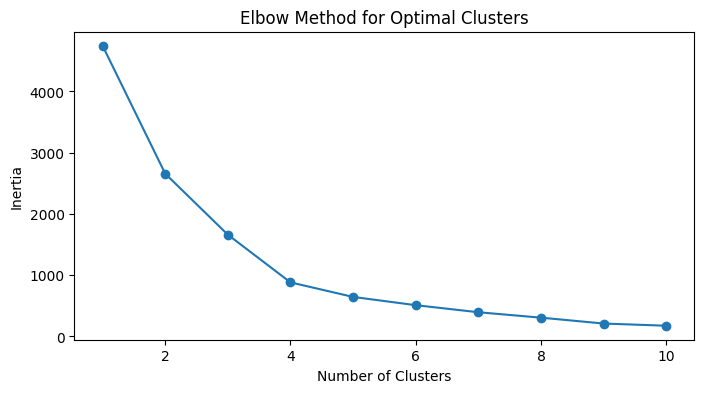

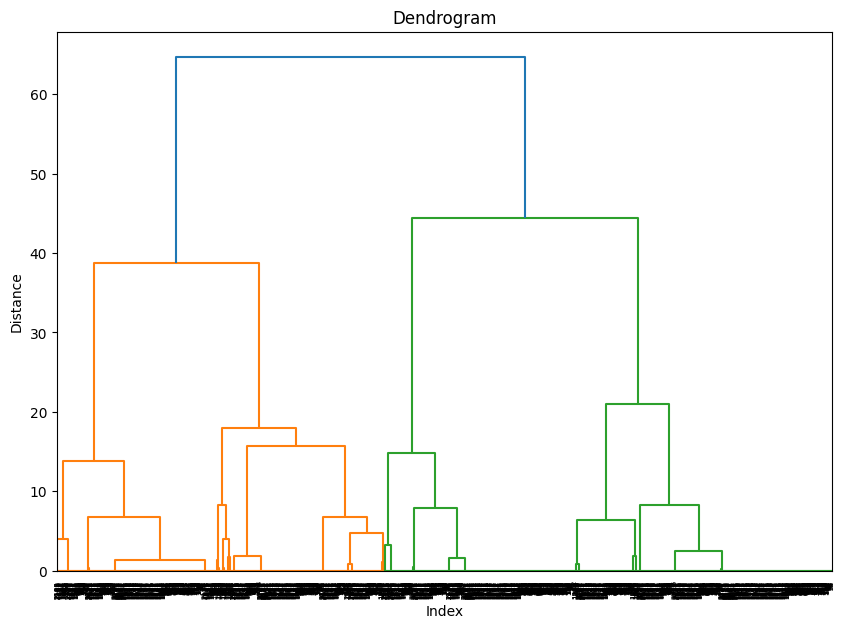

In [52]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Your existing functions...

def calculate_silhouette_score(x, y_pred):
    return silhouette_score(x, y_pred)

# Main function
def main(filepath):
    x = load_data(filepath)

    # Apply PCA for Dimensionality Reduction
    x_pca = apply_pca(x, n_components=2)
    
    # KMeans: finding optimal clusters
    inertia = find_optimal_clusters(x_pca)
    
    # The number of clusters should be the elbow point from the inertia plot
    n_clusters = len(inertia)  # Or replace this with the correct number of clusters if you detect it manually

    # KMeans clustering implementation
    y_kmeans = perform_kmeans_clustering(x_pca, n_clusters=n_clusters)
    
    # Agglomerative Clustering
    y_agglomerative = perform_agglomerative_clustering(x_pca, n_clusters=n_clusters)
    
    # Hierarchical Clustering Dendrogram
    hierarchical_linked = get_linkages(x_pca)
    
    # Plot the dendrogram for hierarchical clustering
    plot_dendrogram(hierarchical_linked)
    
    # Silhouette scores
    silhouette_kmeans = calculate_silhouette_score(x_pca, y_kmeans)
    silhouette_agglomerative = calculate_silhouette_score(x_pca, y_agglomerative)
    
    # Return results
    return {
        "inertia": inertia,
        "silhouette_kmeans": silhouette_kmeans,
        "silhouette_agglomerative": silhouette_agglomerative,
        "agglomerative_clustering": y_agglomerative,
        "hierarchical_linked": hierarchical_linked,
        "pca_components": x_pca
    }

# Call the main function
result = main("D:\Student_copy\marketing_campaign.csv")
